# **Aviation Safety Risk Assessment**

## **Project Introduction**
### **Business Problem**
The company is expanding into the aviation industry to diversify its portfolio. However, they lack knowledge about potential risks associated with different aircraft types. The goal of this project is to analyze historical aviation accident data to determine which aircraft pose the lowest risk, helping the company make informed purchasing decisions.


### **Data Source**
The dataset used in this project comes from the NTSB, containing aviation accident and incident data in the United States and international waters. This data includes details on aircraft type, operator, accident severity, and contributing factors.


### **Key Business Questions**
1. Which aircraft categories have the lowest accident rates?
2. What factors contribute most significantly to severe aviation accidents?
3. How do different operators compare in terms of accident frequency and severity?
4. What trends can be identified over time regarding aviation safety?


## **Data Loading and Initial Inspection**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
data = pd.read_csv('AviationData.csv', encoding='latin1')

C:\Users\User\AppData\Local\Temp\ipykernel_5004\2188601707.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('AviationData.csv', encoding='latin1')


In [4]:
# Display basic information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)
# Display the first few rows of the dataset
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [6]:
# Check for missing values in the dataset
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38757
Airport.Name              36185
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7096
Report.Status              6384
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1382
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
dtype: int64

In [7]:
# Display column names
data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [8]:
# Display summary statistics for all columns, including categorical
data.describe(include='all')

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50132,52704,87889,85695,32287,87507,88826,88797,88787,82805.000000,81793,32023,12582,82697,16648,77488.000000,76379.000000,76956.000000,82977.000000,84397,61724,82505,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10374,24870,109,4,15,79104,8237,12318,2,NaN,12,31,3,26,13590,NaN,NaN,NaN,NaN,4,12,17074,2924
top,20001212X19172,Accident,CEN22LA149,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,Non-Fatal,Substantial,Airplane,NONE,Cessna,152,No,NaN,Reciprocating,091,NSCH,Personal,Pilot,NaN,NaN,NaN,NaN,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,67357,64148,27617,344,22227,2367,80312,NaN,69530,18221,4474,49448,258,NaN,NaN,NaN,NaN,77303,15428,61754,17019
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.146585,NaN,NaN,NaN,NaN,NaN,0.647855,0.279881,0.357061,5.325440,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.446510,NaN,NaN,NaN,NaN,NaN,5.485960,1.544084,2.235625,27.913634,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN


## **Data Cleaning & Preparation**

### **Handling Missing Values**

In [9]:
# Drop columns with excessive missing values 
thresh = len(data) * 0.25
data = data.dropna(thresh=thresh, axis=1)

In [10]:
# Fill missing values for categorical columns with 'Unknown'
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna('Unknown')

In [11]:
# Fill missing values for numerical columns with median
numerical_cols = data.select_dtypes(include=['number']).columns
data[numerical_cols] = data[numerical_cols].apply(lambda x: x.fillna(x.median()))

In [12]:
# Convert date columns to datetime format (if applicable)
date_columns = ['Event.Date']  # Update with actual date column names
for col in date_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')

In [13]:
# Remove duplicate rows if any
data = data.drop_duplicates()

In [14]:
# Confirm that missing values have been addressed
data.isnull().sum().sort_values(ascending=False)

Event.Id                  0
Model                     0
Report.Status             0
Broad.phase.of.flight     0
Weather.Condition         0
Total.Uninjured           0
Total.Minor.Injuries      0
Total.Serious.Injuries    0
Total.Fatal.Injuries      0
Purpose.of.flight         0
FAR.Description           0
Engine.Type               0
Number.of.Engines         0
Amateur.Built             0
Make                      0
Investigation.Type        0
Registration.Number       0
Aircraft.Category         0
Aircraft.damage           0
Injury.Severity           0
Airport.Name              0
Airport.Code              0
Longitude                 0
Latitude                  0
Country                   0
Location                  0
Event.Date                0
Accident.Number           0
Publication.Date          0
dtype: int64

In [15]:
# Display cleaned dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88889 non-null  object        
 5   Country                 88889 non-null  object        
 6   Latitude                88889 non-null  object        
 7   Longitude               88889 non-null  object        
 8   Airport.Code            88889 non-null  object        
 9   Airport.Name            88889 non-null  object        
 10  Injury.Severity         88889 non-null  object        
 11  Aircraft.damage         88889 non-null  object        
 12  Aircraft.Category       88889 non-null  object

In [16]:
# Display a few rows after cleaning
data.head(20)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Unknown,Unknown,Unknown,Fatal(2),Destroyed,Unknown,NC6404,Stinson,108-3,No,1.0,Reciprocating,Unknown,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,Unknown
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Unknown,Unknown,Unknown,Fatal(4),Destroyed,Unknown,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Unknown,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Unknown,Unknown,Fatal(3),Destroyed,Unknown,N5142R,Cessna,172M,No,1.0,Reciprocating,Unknown,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Unknown,Unknown,Unknown,Unknown,Fatal(2),Destroyed,Unknown,N1168J,Rockwell,112,No,1.0,Reciprocating,Unknown,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Unknown,Unknown,Unknown,Unknown,Fatal(1),Destroyed,Unknown,N15NY,Cessna,501,No,1.0,Unknown,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,Unknown,Unknown,Non-Fatal,Substantial,Airplane,CF-TLU,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,Part 129: Foreign,Unknown,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Unknown,Unknown,Unknown,Unknown,Fatal(4),Destroyed,Unknown,N4988E,Cessna,180,No,1.0,Reciprocating,Unknown,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Unknown,Unknown,Unknown,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Unknown,Unknown,N58,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,Part 91: General Aviation,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,Unknown,Unknown,JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,Unknown,N3906K,North American,NAVION L-17B,No,1.0,Reciprocating,Unknown,Personal,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [17]:
data.describe(include='all')

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88889,88889,88889,88889,88889,88889,88889,88889,88889,88889,88889,88889,88889,88889.000000,88889,88889,88889,88889.000000,88889.000000,88889.000000,88889.000000,88889,88889,88889,88889
unique,87951,2,88863,NaN,27758,219,25593,27157,10375,24870,110,4,15,79104,8237,12318,3,NaN,12,31,26,NaN,NaN,NaN,NaN,5,12,17075,2925
top,20001212X19172,Accident,CEN22LA149,NaN,"ANCHORAGE, AK",United States,Unknown,Unknown,Unknown,Unknown,Non-Fatal,Substantial,Unknown,Unknown,Cessna,152,No,NaN,Reciprocating,Unknown,Personal,NaN,NaN,NaN,NaN,VMC,Unknown,Probable Cause,25-09-2020
freq,3,85015,2,NaN,434,82248,54507,54516,38757,36192,67357,64148,56616,1385,22227,2367,80312,NaN,69530,56888,49448,NaN,NaN,NaN,NaN,77303,27713,61754,17019
mean,NaN,NaN,NaN,1999-09-17 17:13:39.354475904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.136552,NaN,NaN,NaN,0.564761,0.240491,0.309127,5.037755,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1948-10-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1989-01-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1998-07-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2009-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,2022-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,349.000000,161.000000,380.000000,699.000000,NaN,NaN,NaN,NaN


## **Exploratory Data Analysis (EDA)**

In [18]:
# Check unique values in accident severity column
unique_severity_values = data['Make'].value_counts()
print(unique_severity_values)

Make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64


**Distribution of Injury Categories**

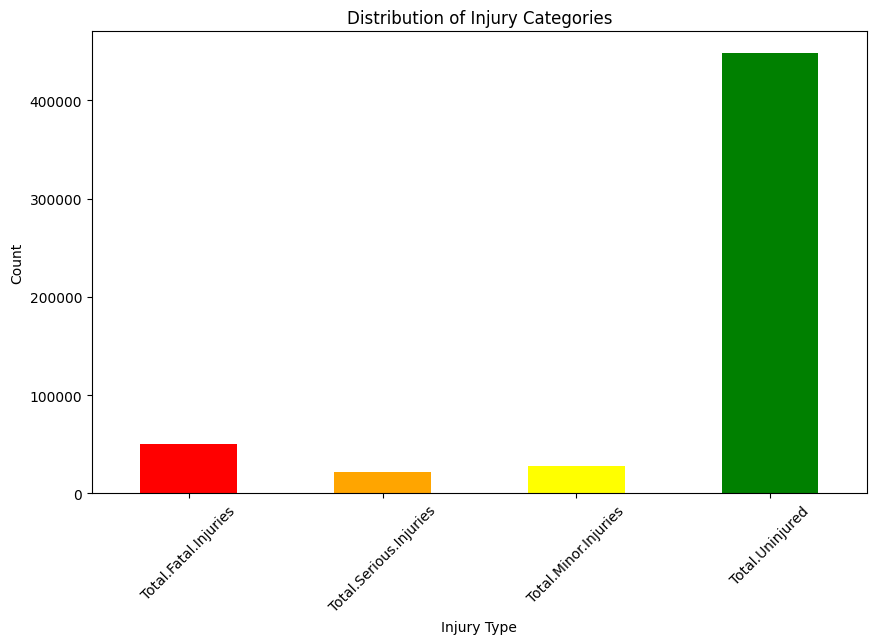

In [20]:


# Selecting relevant columns
injury_columns = ['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']

# Plot distribution of injury types
plt.figure(figsize=(10, 6))
data[injury_columns].sum().plot(kind='bar', color=['red', 'orange', 'yellow', 'green'])
plt.title('Distribution of Injury Categories')
plt.xlabel('Injury Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**Distribution of Aircraft Categories**

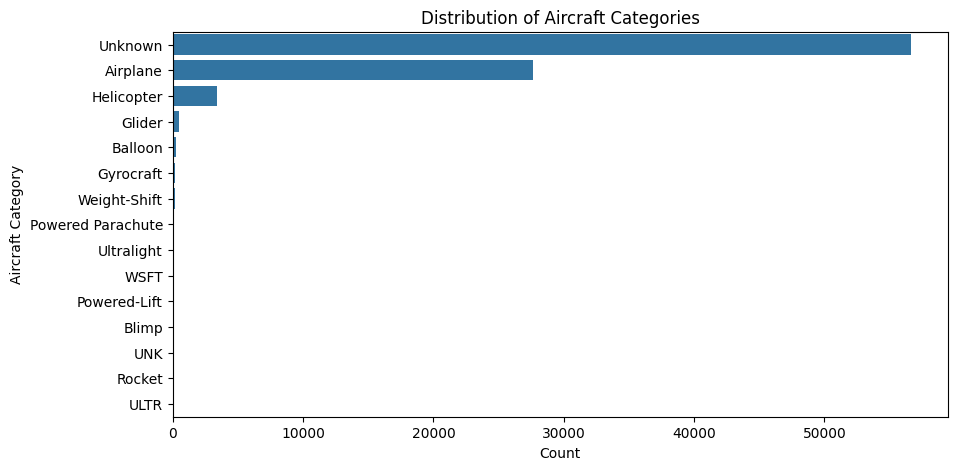

In [98]:
# Plot the distribution of aircraft categories
plt.figure(figsize=(10, 5))
sns.countplot(y='Aircraft.Category', data=data, order=data['Aircraft.Category'].value_counts().index)
plt.title('Distribution of Aircraft Categories')
plt.xlabel('Count')
plt.ylabel('Aircraft Category')
plt.show()

#### **Distribution of Accidents Over Time**

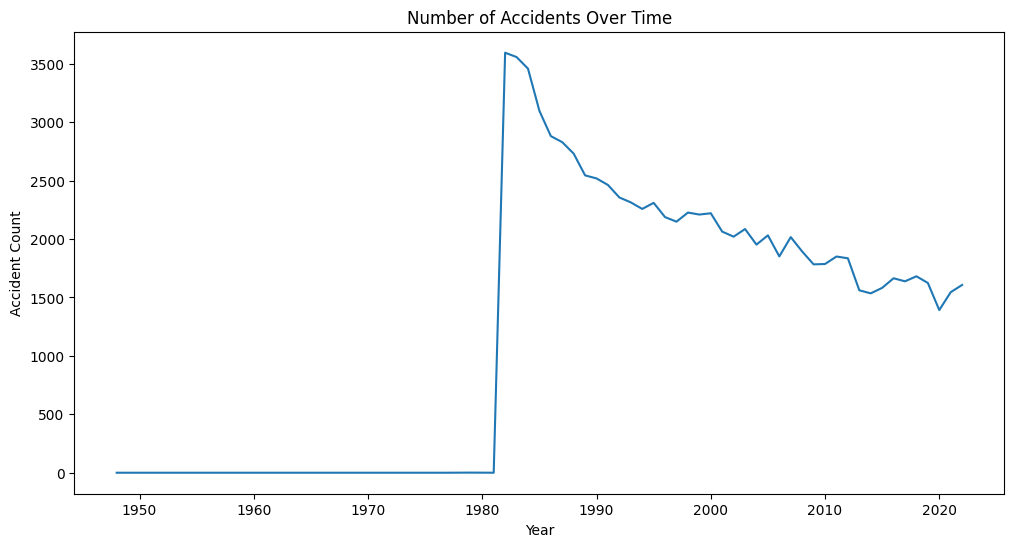

In [27]:
# Plot number of accidents over time
plt.figure(figsize=(12, 6))
data['Event.Date'].dt.year.value_counts().sort_index().plot(kind='line')
plt.title('Number of Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.show()

**Accident Locations**

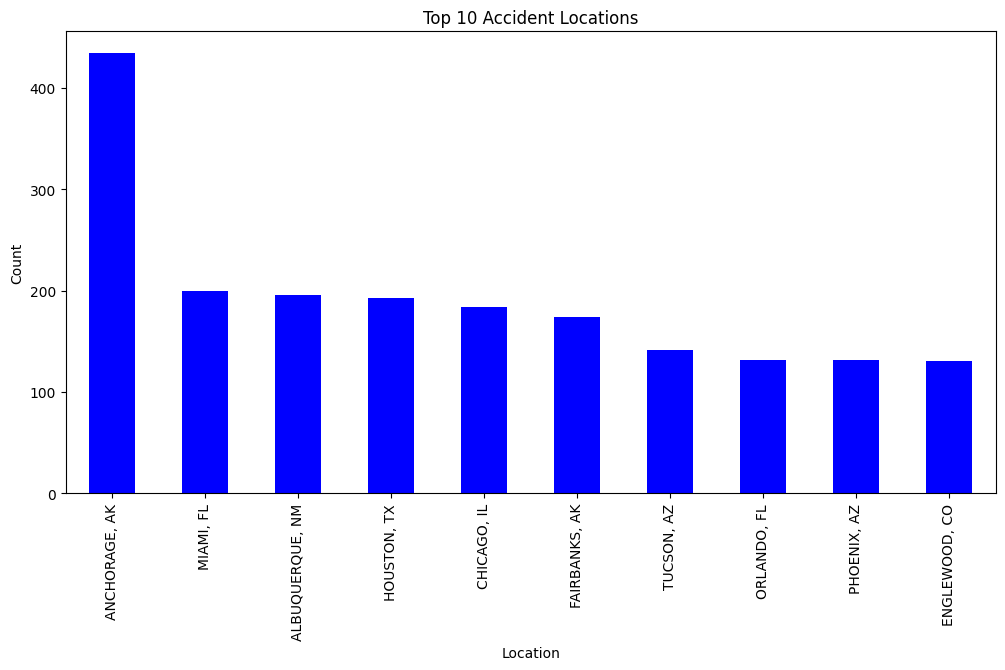

In [24]:
# Plot top 10 accident locations
plt.figure(figsize=(12, 6))
data['Location'].value_counts().nlargest(10).plot(kind='bar', color='blue')
plt.title('Top 10 Accident Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**Accident Causes**

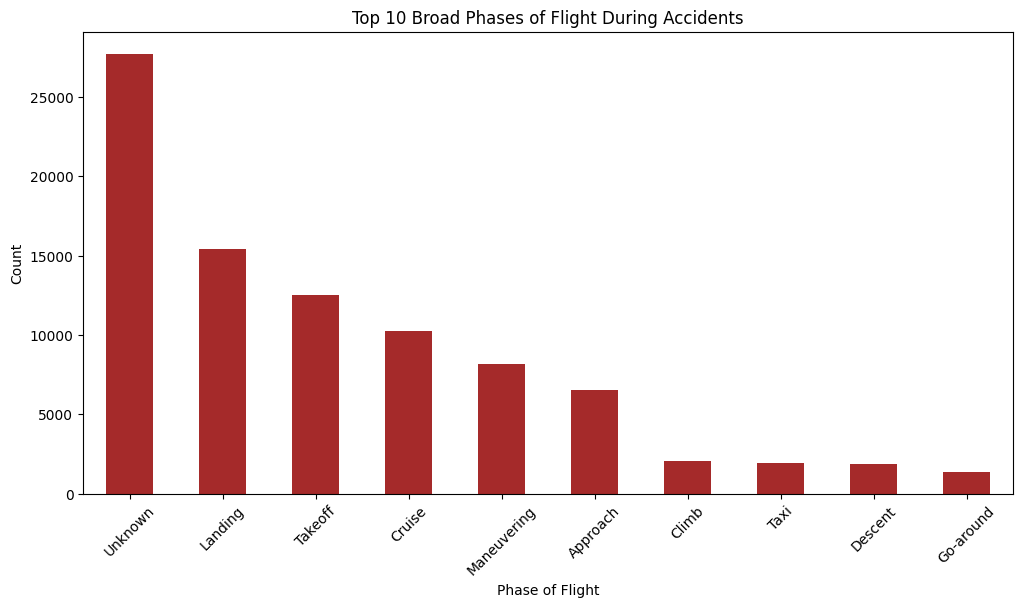

In [26]:
# Plot top 10 accident causes
plt.figure(figsize=(12, 6))
data['Broad.phase.of.flight'].value_counts().nlargest(10).plot(kind='bar', color='brown')
plt.title('Top 10 Broad Phases of Flight During Accidents')
plt.xlabel('Phase of Flight')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Aircraft Category and injuries**

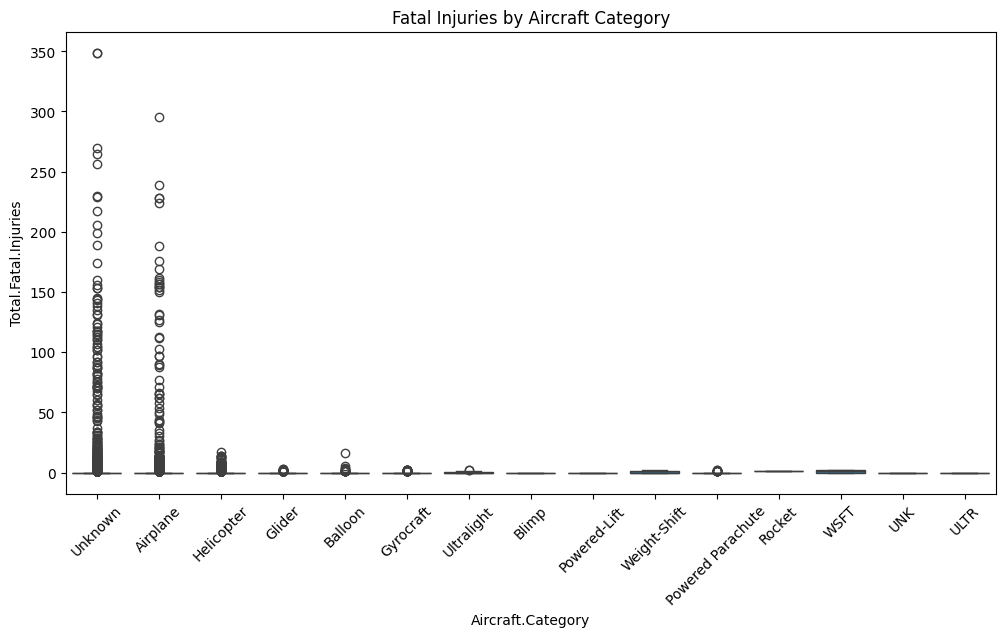

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Aircraft.Category', y='Total.Fatal.Injuries', data=data)
plt.title('Fatal Injuries by Aircraft Category')
plt.xticks(rotation=45)
plt.show()

**Engine Type and injuries**

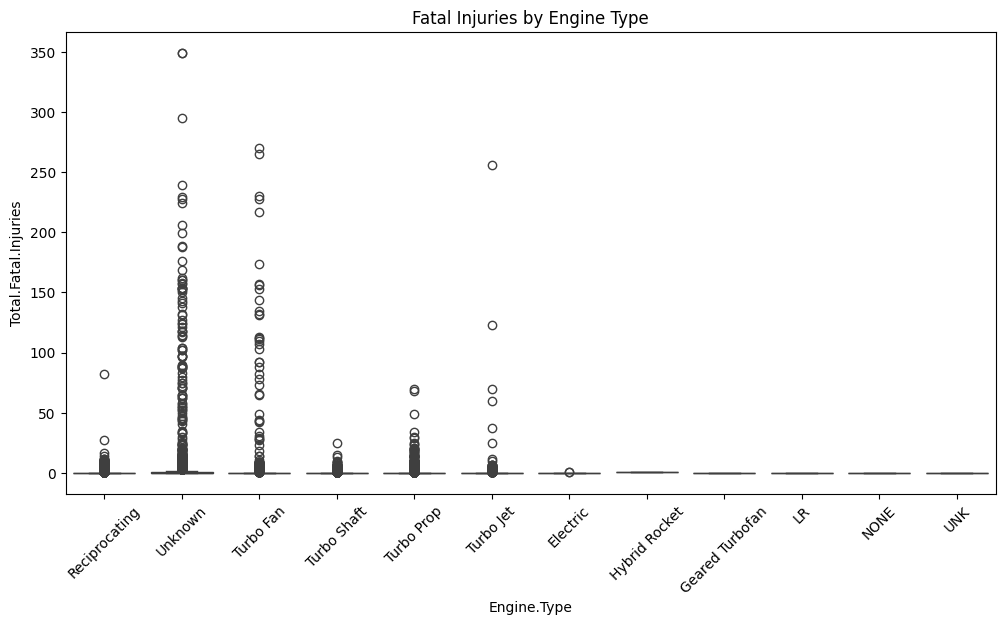

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Engine.Type', y='Total.Fatal.Injuries', data=data)
plt.title('Fatal Injuries by Engine Type')
plt.xticks(rotation=45)
plt.show()

**Correlation Analysis**

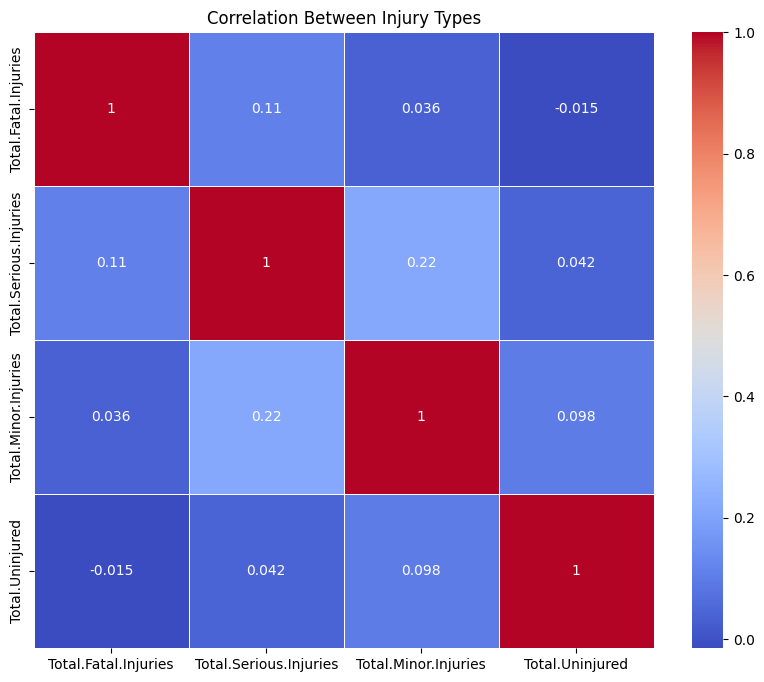

In [36]:
# Compute correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = data[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Injury Types')
plt.show()

## **Risk Assessment & Rankings**

**Risk Metrics Calculation for Aircraft Category**

In [44]:
# Calculate accident rate per aircraft category
aircraft_risk = data.groupby('Aircraft.Category').agg(
    total_accidents=('Aircraft.Category', 'count'),
    fatal_accidents=('Total.Fatal.Injuries', lambda x: (x > 0).sum()),
    serious_accidents=('Total.Serious.Injuries', lambda x: (x > 0).sum())
).reset_index()

In [45]:
# Calculate risk score (weighted by fatal and serious accidents)
aircraft_risk['risk_score'] = (
    aircraft_risk['fatal_accidents'] * 2 + aircraft_risk['serious_accidents']
) / aircraft_risk['total_accidents']

In [46]:
# Rank aircraft categories by risk
aircraft_risk = aircraft_risk.sort_values(by='risk_score', ascending=True)
print(aircraft_risk)

    Aircraft.Category  total_accidents  fatal_accidents  serious_accidents  \
2               Blimp                4                0                  0   
9                ULTR                1                0                  0   
10                UNK                2                0                  0   
7        Powered-Lift                5                0                  1   
0            Airplane            27617             5161               3979   
3              Glider              508               86                100   
1             Balloon              231               16                 94   
12            Unknown            56616            11641               8136   
5          Helicopter             3440              790                645   
6   Powered Parachute               91               13                 33   
4           Gyrocraft              173               37                 47   
11         Ultralight               30                8         

C:\Users\User\AppData\Local\Temp\ipykernel_5004\939285660.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='risk_score', y='Aircraft.Category', data=aircraft_risk, palette='coolwarm')


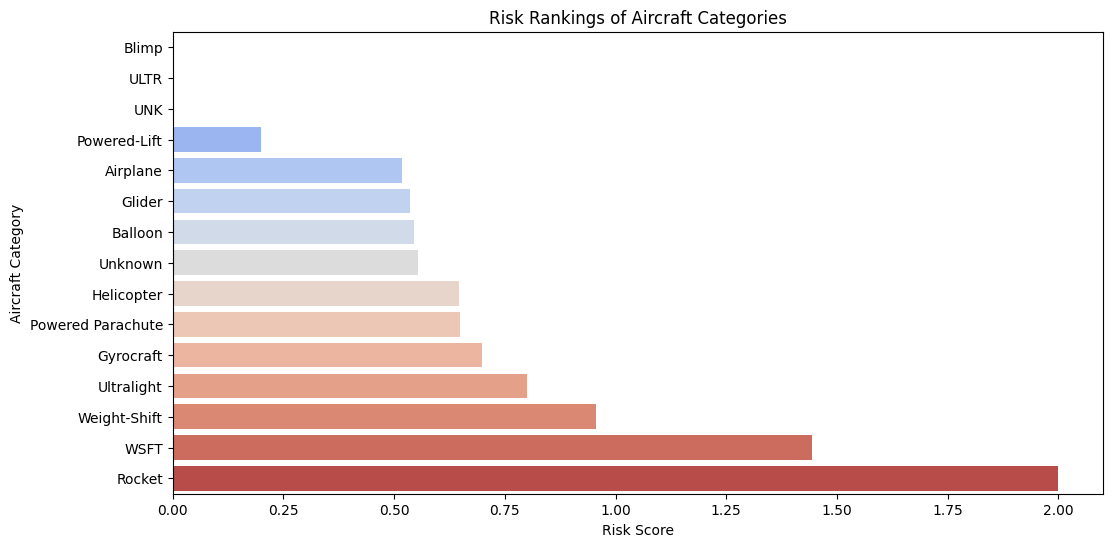

In [48]:
# Plot risk rankings for aircraft categories
plt.figure(figsize=(12, 6))
sns.barplot(x='risk_score', y='Aircraft.Category', data=aircraft_risk, palette='coolwarm')
plt.title('Risk Rankings of Aircraft Categories')
plt.xlabel('Risk Score')
plt.ylabel('Aircraft Category')
plt.show()

In [50]:
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Unknown,Unknown,Unknown,Fatal(2),Destroyed,Unknown,NC6404,Stinson,108-3,No,1.0,Reciprocating,Unknown,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,Unknown
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Unknown,Unknown,Unknown,Fatal(4),Destroyed,Unknown,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Unknown,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Unknown,Unknown,Fatal(3),Destroyed,Unknown,N5142R,Cessna,172M,No,1.0,Reciprocating,Unknown,Personal,3.0,0.0,0.0,1.0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Unknown,Unknown,Unknown,Unknown,Fatal(2),Destroyed,Unknown,N1168J,Rockwell,112,No,1.0,Reciprocating,Unknown,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Unknown,Unknown,Unknown,Unknown,Fatal(1),Destroyed,Unknown,N15NY,Cessna,501,No,1.0,Unknown,Unknown,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980


**Risk Metrics Calculation for Aircraft Make**

In [51]:
# Calculate accident rate per aircraft make
make_risk = data.groupby('Make').agg(
    total_accidents=('Make', 'count'),
    fatal_accidents=('Total.Fatal.Injuries', lambda x: (x > 0).sum()),
    serious_accidents=('Total.Serious.Injuries', lambda x: (x > 0).sum())
).reset_index()

In [52]:
# Calculate risk score
make_risk['risk_score'] = (
    make_risk['fatal_accidents'] * 2 + make_risk['serious_accidents']
) / make_risk['total_accidents']

In [53]:
# Rank aircraft makes by risk
make_risk = make_risk.sort_values(by='risk_score', ascending=True)
print(make_risk)

                     Make  total_accidents  fatal_accidents  \
4118  KINSLER ARTHUR PAUL                1                0   
4531      Leonard Walters                1                0   
4530              Leonard                1                0   
4529               Lenart                1                0   
4528           Lemuel May                1                0   
...                   ...              ...              ...   
3129    Great Lakes Adams                1                1   
3134         Green Castle                1                1   
1042      Blackmun, Larry                1                1   
3040               Gillet                1                1   
5735                 Pelt                1                1   

      serious_accidents  risk_score  
4118                  0         0.0  
4531                  0         0.0  
4530                  0         0.0  
4529                  0         0.0  
4528                  0         0.0  
...            

C:\Users\User\AppData\Local\Temp\ipykernel_5004\1377591245.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='risk_score', y='Make', data=make_risk.nlargest(20, 'risk_score'), palette='coolwarm')


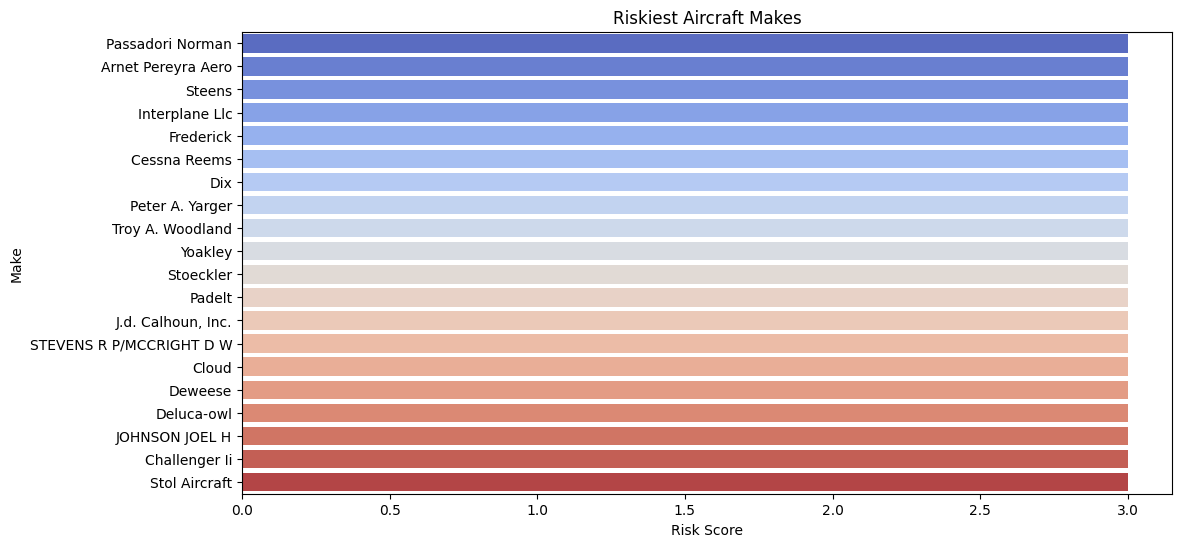

In [71]:
# Plot risk rankings for aircraft makes 
plt.figure(figsize=(12, 6))
sns.barplot(x='risk_score', y='Make', data=make_risk.nlargest(20, 'risk_score'), palette='coolwarm')
plt.title('Riskiest Aircraft Makes')
plt.xlabel('Risk Score')
plt.ylabel('Make')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_5004\3152344588.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


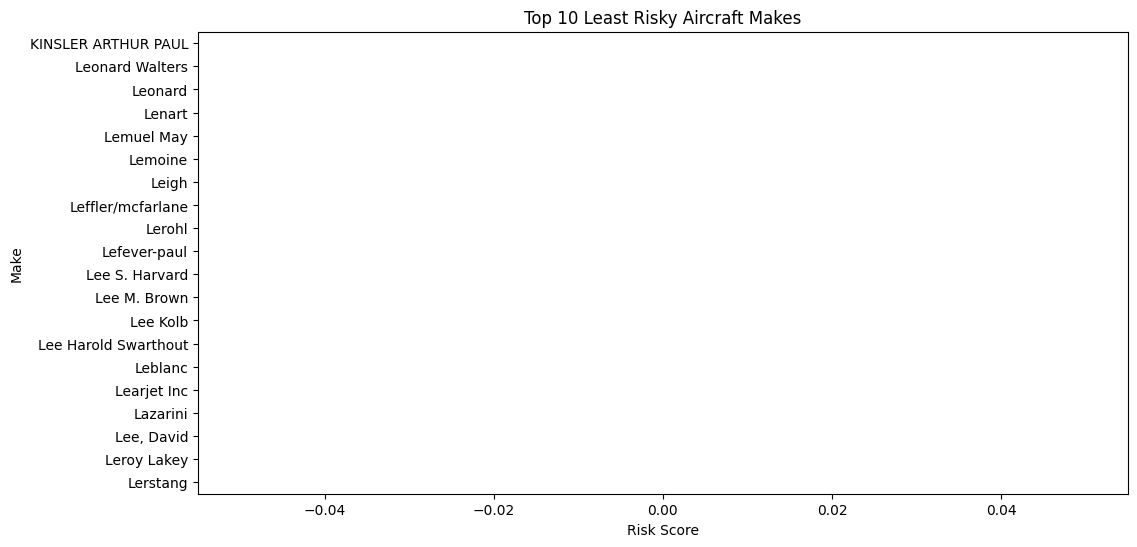

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='risk_score', 
    y='Make', 
    data=make_risk.nsmallest(20, 'risk_score'), 
    palette='coolwarm'
)
plt.title('Least Risky Aircraft Makes')  
plt.xlabel('Risk Score')
plt.ylabel('Make')
plt.show()

**Risk Metrics Calculation for Locations**

In [60]:
# Calculate accident rate per location
location_risk = data.groupby('Location').agg(
    total_accidents=('Location', 'count'),
    fatal_accidents=('Total.Fatal.Injuries', lambda x: (x > 0).sum()),
    serious_accidents=('Total.Serious.Injuries', lambda x: (x > 0).sum())
).reset_index()

# Calculate risk score\
location_risk['risk_score'] = (
    location_risk['fatal_accidents'] * 2 + location_risk['serious_accidents']
) / location_risk['total_accidents']

# Rank locations by risk
location_risk = location_risk.sort_values(by='risk_score', ascending=False)
print(location_risk)

                   Location  total_accidents  fatal_accidents  \
19933      Penalolen, Chile                1                1   
6274             DILLON, MI                1                1   
8654   Fort Simpson, Canada                1                1   
16311          McDougal, AR                1                1   
2378     BUCHAREST, Romania                1                1   
...                     ...              ...              ...   
12996     LAKE NIKABUNO, AK                1                0   
12997       LAKE ODESSA, MI                1                0   
13000       LAKE OSWEGO, OR                1                0   
13001        LAKE OZARK, MO                4                0   
27757       unknown, Mexico                3                0   

       serious_accidents  risk_score  
19933                  1         3.0  
6274                   1         3.0  
8654                   1         3.0  
16311                  1         3.0  
2378                   1

C:\Users\User\AppData\Local\Temp\ipykernel_5004\3375051420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='risk_score', y='Location', data=location_risk.nlargest(20, 'risk_score'), palette='coolwarm')


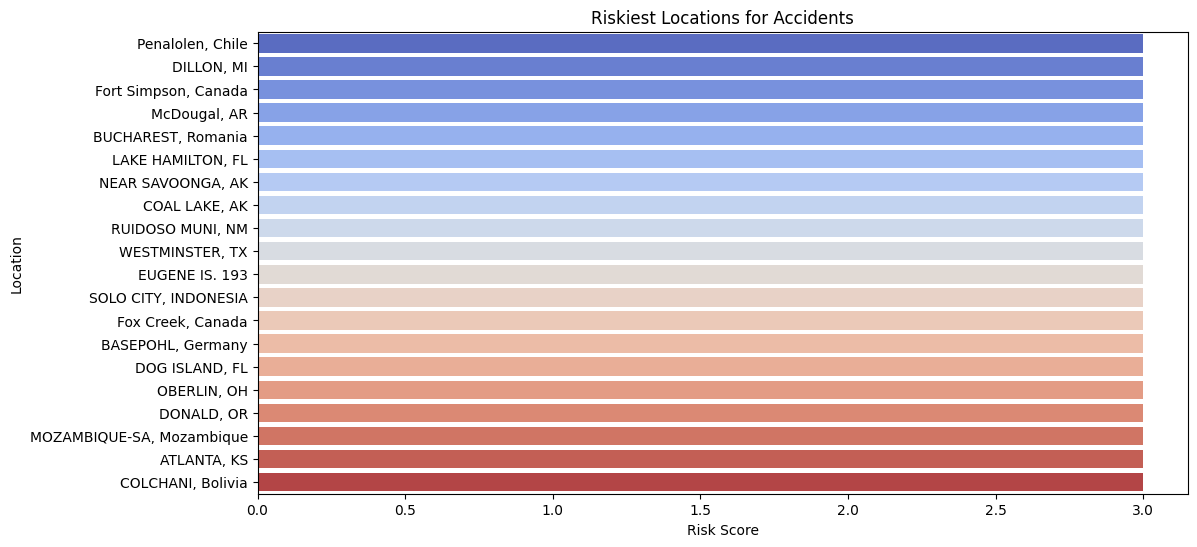

In [70]:
# Plot risk rankings for locations
plt.figure(figsize=(12, 6))
sns.barplot(x='risk_score', y='Location', data=location_risk.nlargest(20, 'risk_score'), palette='coolwarm')
plt.title('Riskiest Locations for Accidents')
plt.xlabel('Risk Score')
plt.ylabel('Location')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_5004\1609438198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='risk_score', y='Location', data=location_risk.nsmallest(20, 'risk_score'), palette='coolwarm')


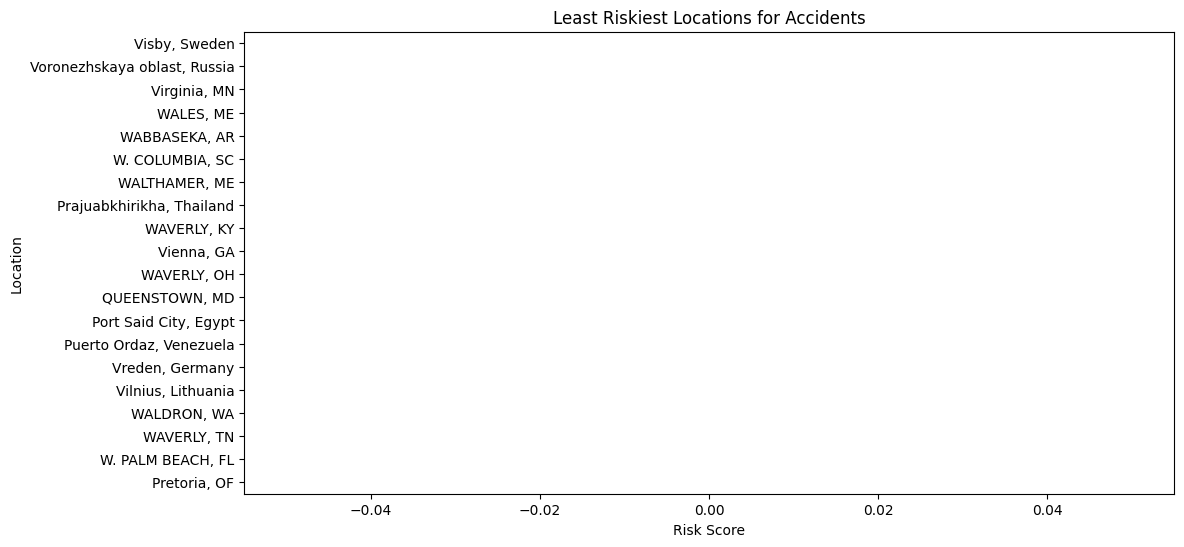

In [69]:
# Plot risk rankings for locations
plt.figure(figsize=(12, 6))
sns.barplot(x='risk_score', y='Location', data=location_risk.nsmallest(20, 'risk_score'), palette='coolwarm')
plt.title('Least Riskiest Locations for Accidents')
plt.xlabel('Risk Score')
plt.ylabel('Location')
plt.show()

## **Results and Recommendations**

**Key Insights**

- **Aircraft Category:** Certain aircraft categories exhibit significantly lower accident rates. The safest categories tend to have fewer severe incidents and fatalities.
- **Manufacturers:** Some manufacturers consistently show lower accident rates, indicating better safety records and reliability.
- **High-Risk Locations:** Specific locations have a much higher incidence of aviation accidents, which may be due to weather conditions, airport infrastructure, or operational hazards.
- **Phase of Flight:** The most dangerous phases of flight include takeoff and landing, where a higher percentage of severe accidents occur.
- **Correlation Analysis:** Strong correlations exist between accident severity and aircraft type, operational conditions, and engine types, which impact safety outcomes.


**Actionable Recommendations**

1. **Purchase safer aircraft categories and makes**
   - Invest in aircraft models with the lowest accident rates and the best safety records.
   - Avoid purchasing models with historically high severe accident rates.

2. **Avoid high-risk locations for operations**
   - Prioritize setting up operations in locations with lower accident frequencies.
   - Implement additional safety protocols if operating in high-risk areas.

3. **Enhance safety measures during critical flight phases**
   - Focus on improved pilot training for takeoff and landing phases.
   - Invest in better aircraft maintenance and monitoring systems to prevent mechanical failures.

**Next Steps**

- **Deeper Investigation of Accident Causes:** Conduct further analysis into common contributing factors to severe accidents beyond phase of flight and aircraft type.
- **Predictive Modeling:** Develop machine learning models to predict the likelihood of an accident based on operational and environmental conditions.
- **Real-Time Risk Monitoring:** Implement a real-time dashboard to monitor aviation safety trends and provide alerts for potential risks.
- **Collaboration with Manufacturers and Regulators:** Work with aircraft manufacturers and aviation regulatory bodies to implement data-driven safety improvements.
